# THE SPARK FOUNDATION

# DATA SCIENCE & BUSINESS ANALYTICS INTERN (GRIP FEB 2022)

# AUTHOR :- RASIKA NILESH BAGDE

### Task 2 - Prediction Using Unsupervised Machine Learning

### From the given 'iris' dataset, predict the optimium number of clusters and represent it visually.

###### Importing Libraries

In [1]:
#library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets


#loading the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### K-means clusturing


#### Optimal value of k using Elbow plot

In [2]:
#finding optimum number of clusters for k-means classification
x = iris_df.iloc[:, [0, 1, 2, 3,]].values #Data arrangment
from sklearn.cluster import KMeans
wcss = [] #Empty list to store wcss

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init =10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\Rasika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


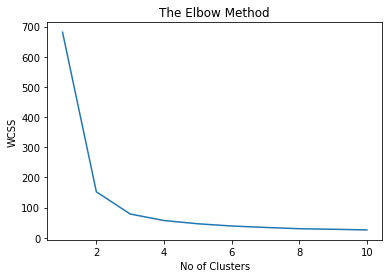

In [3]:
#Plotting the results into a line graph
#Observe the elbow
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS') 
plt.show()

##### From this we choose the no of clusters as 3

#### The Elbow method from the graph as the optimum clusters is where the elbow occurs.This is when the within cluster sum of squares (wcss) doesnt decreases sinificantly withevery iteration.

#### Applying kmeans to dataset for creating the kmeans cluster

In [4]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#### Visualising the Clusters

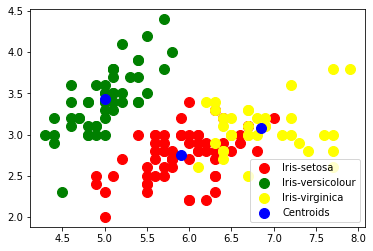

In [5]:
#For first two columns
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
           s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
           s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
           s = 100, c = 'yellow', label = 'Iris-virginica')

#Ploting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 100, c = 'blue', label = 'Centroids')
plt.legend()   

#### The three clusters formed & Represents the type if iris flowers